# Instacart - The shopping habits of customers 

In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

In [3]:
products = pd.read_csv('/datasets/products.csv', sep=';')

In [4]:
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [5]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

In [6]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')

In [7]:
import matplotlib.pyplot as plt

### `orders` data frame

In [ ]:
order_dups = orders.duplicated()
print(orders[order_dups])
print(order_dups.sum())
#used to find duplicates and print only the duplicates

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [ ]:
print(orders[(orders['order_dow'] == 2) & (orders['order_hour_of_day'] == 2)])
#lists all on day 3 and hour 2 which i believe is wednesday and 2 am 

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1295     1474941   115569             5          2                  2   
2391     1640269   173965            15          2                  2   
2550     1223696    55276            11          2                  2   
5965      579194    85018            14          2                  2   
17680    2004230   203121             4          2                  2   
...          ...      ...           ...        ...                ...   
457660   1562381    19378             5          2                  2   
460316   1986084   117453            81          2                  2   
462676   1362113    19654            20          2                  2   
472800   1746383    88484            19          2                  2   
472923   1519815   149345             1          2                  2   

        days_since_prior_order  
1295                      28.0  
2391                       2.0  
2550                    

In [ ]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [ ]:
# Double check for duplicate rows
order_dups = orders.duplicated()
print(orders[order_dups])
print(order_dups.sum())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
0


In [ ]:
# Double check for duplicate order IDs only
order_id_dup = orders['order_id'].duplicated()
display(order_id_dup.sum())
#used sum to see if any more exist in just order id

0


### `products` data frame

In [ ]:
# Check for fully duplicate rows
dup_prod = products.duplicated()
print(dup_prod.sum())
#no fully duplicated products

0


In [ ]:
dup_id = products['product_id'].duplicated()
print(dup_id.sum())
# Check for just duplicate product IDs
#no duplicate IDs

0


In [ ]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
name_dup = products['product_name'].duplicated()
print(products[name_dup])
print(name_dup.sum())
print(products[name_dup].isna().sum())

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    high performance energy drink        64   
49690       49691                    original pancake & waffle mix       130   
49691       49692  organic instant oatmeal light maple brown sugar       130   
49692       49693                           spring water body wash       127   
49693       49694                          burrito- steak & cheese        38   

       department_id  
71              

In [ ]:
# Check for duplicate product names that aren't missing
print(products['product_name'].isna().sum())
print(products[name_dup].isna())
#there are 104 duplicate names that arent missing

1258
       product_id  product_name  aisle_id  department_id
71          False          True     False          False
109         False          True     False          False
296         False          True     False          False
416         False          True     False          False
436         False          True     False          False
...           ...           ...       ...            ...
49689       False         False     False          False
49690       False         False     False          False
49691       False         False     False          False
49692       False         False     False          False
49693       False         False     False          False

[1361 rows x 4 columns]


### `departments` data frame

In [ ]:
print(departments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [ ]:
print(departments)

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


### `aisles` data frame

In [ ]:
print(aisles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [ ]:
aisle_100 = aisles['aisle_id']==100
print(aisles[aisle_100])

    aisle_id    aisle
99       100  missing


### `order_products` data frame

In [ ]:
# Check for fully duplicate rows
op_dups = order_products.duplicated()
print(order_products[op_dups])
print(op_dups.sum())

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
0


## Find and remove missing values


### `products` data frame

In [ ]:
print(products)

       product_id                                       product_name  \
0               1                         chocolate sandwich cookies   
1               2                                   all-seasons salt   
2               3               robust golden unsweetened oolong tea   
3               4  smart ones classic favorites mini rigatoni wit...   
4               5                          green chile anytime sauce   
...           ...                                                ...   
49689       49690                      high performance energy drink   
49690       49691                      original pancake & waffle mix   
49691       49692    organic instant oatmeal light maple brown sugar   
49692       49693                             spring water body wash   
49693       49694                            burrito- steak & cheese   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

In [ ]:
aisle_id100 = products['aisle_id'] == 100
display(products[aisle_id100].isna())
#yes

,product_id,product_name,aisle_id,department_id
37,False,True,False,False
71,False,True,False,False
109,False,True,False,False
296,False,True,False,False
416,False,True,False,False
...,...,...,...,...
49552,False,True,False,False
49574,False,True,False,False
49640,False,True,False,False
49663,False,True,False,False


In [ ]:
department_21 = products['department_id']==21
display(products[department_21].isna())
#yes

,product_id,product_name,aisle_id,department_id
37,False,True,False,False
71,False,True,False,False
109,False,True,False,False
296,False,True,False,False
416,False,True,False,False
...,...,...,...,...
49552,False,True,False,False
49574,False,True,False,False
49640,False,True,False,False
49663,False,True,False,False


In [ ]:
display(products[department_21])
display(aisles[aisle_100])
#the department is "missing" and the aisle is also "missing"

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


,aisle_id,aisle
99,100,missing


In [ ]:
products['product_name'] = products['product_name'].fillna('unknown')
print(products['product_name'].isna().sum())

0


### `orders` data frame

In [ ]:
print(orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [ ]:
print(orders.isna().sum())
first_order = orders['order_number'] == 1 
print(first_order.sum())
print(orders[first_order].isna().sum())
#all missing values are related to the first order since there wasa no order before that

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
28817
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


### `order_products` data frame

In [ ]:
print(order_products)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]


In [ ]:
print(order_products.min(),order_products.max())
#all min and max values are displayed below

order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64 order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64


In [ ]:
print(order_products.isna().sum())
id_with_missing = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
print(id_with_missing)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [ ]:
order_counts = order_products[order_products['order_id'].isin(id_with_missing)].groupby('order_id')['product_id'].count()
display(order_counts.sort_values(ascending = False))
#all missing values have more than 64 products

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
1598369     65
747668      65
1677118     65
9310        65
Name: product_id, Length: 70, dtype: int64

In [ ]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna('999')
print(order_products['add_to_cart_order'].isna().sum())

0


In [ ]:
unique_hod = orders['order_hour_of_day'].unique()
print(sorted(unique_hod))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [ ]:
unique_dow = orders['order_dow'].unique()
print(sorted(unique_dow))

[0, 1, 2, 3, 4, 5, 6]


### What time of day do people shop for groceries?

10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2       989
3       770
4       765
Name: order_hour_of_day, dtype: int64


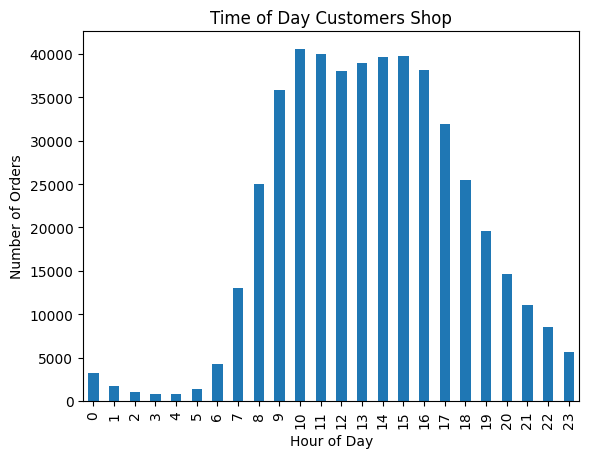

In [ ]:
print(orders['order_hour_of_day'].value_counts())
order_hour = orders.groupby('order_hour_of_day')['order_id'].count()
order_hour.plot(kind='bar')
plt.title('Time of Day Customers Shop')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()
#most people shop at 10 am assuming 0 is midnight as in military time

### What day of the week do people shop for groceries?

0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: order_dow, dtype: int64


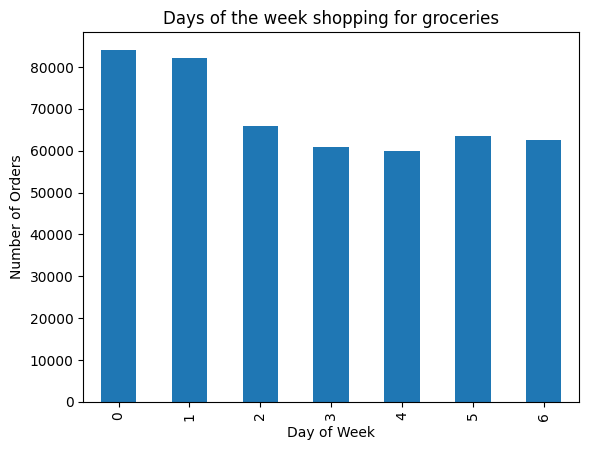

In [ ]:
print(orders['order_dow'].value_counts())
orders['order_dow'].value_counts().sort_index().plot(kind='bar')
plt.title('Days of the week shopping for groceries')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()
#most people shop on day 0

### How long do people wait until placing another order?

30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
5.0     30096
2.0     27138
8.0     25361
1.0     20179
9.0     16753
14.0    13992
10.0    13309
13.0    11737
11.0    11467
12.0    10658
0.0      9589
15.0     9416
16.0     6587
21.0     6448
17.0     5498
20.0     5302
18.0     4971
19.0     4939
22.0     4514
28.0     3745
23.0     3337
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: days_since_prior_order, dtype: int64


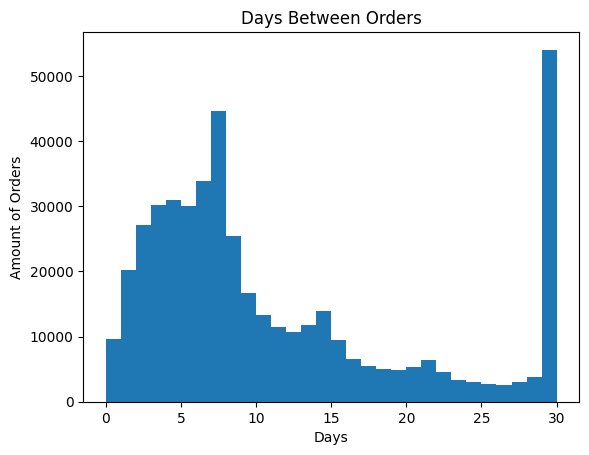

In [ ]:
print(orders['days_since_prior_order'].value_counts())
orders['days_since_prior_order'].plot(kind='hist', title="Days Between Orders", bins=30)
plt.xlabel('Days')
plt.ylabel('Amount of Orders')
plt.show()
#people most often wait 30 days before placing another order

### Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? 

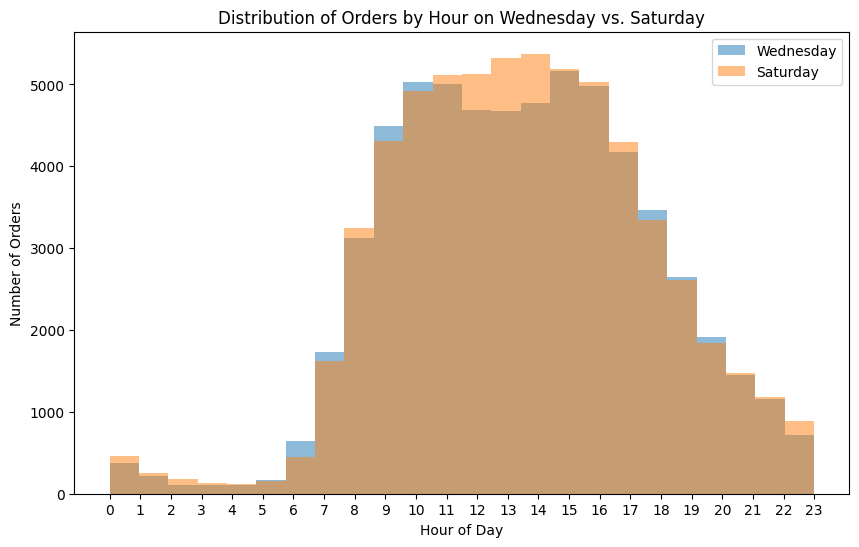

In [ ]:
wed = orders[orders['order_dow'] == 3]['order_hour_of_day']
sat = orders[orders['order_dow'] == 6]['order_hour_of_day']

plt.figure(figsize=(10, 6))

plt.hist(wed, bins=24, alpha=0.5, label='Wednesday')
plt.hist(sat, bins=24, alpha=0.5, label='Saturday')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour on Wednesday vs. Saturday')
plt.xticks(range(0, 24))
plt.legend()

plt.show()
#there are more orders placed on wednesday than saturday

### What's the distribution for the number of orders per customer?

In [ ]:
order_counts = orders.groupby('user_id')['order_id'].nunique()

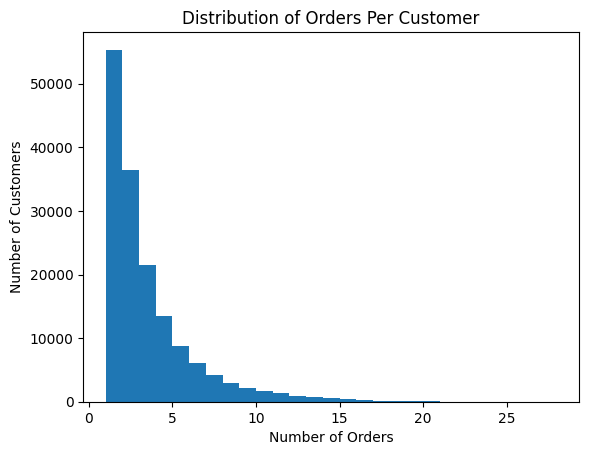

In [ ]:
order_counts.hist(bins=range(1, order_counts.max() + 1), grid=False)
plt.title('Distribution of Orders Per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

### What are the top 20 popular products?

In [ ]:
merged_df = pd.merge(order_products, products, on='product_id')

In [ ]:
product_count = merged_df.groupby(['product_id', 'product_name']).size().reset_index(name='count')
product_count = product_count.sort_values(by='count', ascending=False)

In [ ]:
product_count[['product_id', 'product_name']].head(20)

,product_id,product_name
22808,24852,banana
12025,13176,bag of organic bananas
19370,21137,organic strawberries
20077,21903,organic baby spinach
43271,47209,organic hass avocado
43788,47766,organic avocado
43663,47626,large lemon
15364,16797,strawberries
24047,26209,limes
25556,27845,organic whole milk


### How many items do people typically buy in one order?

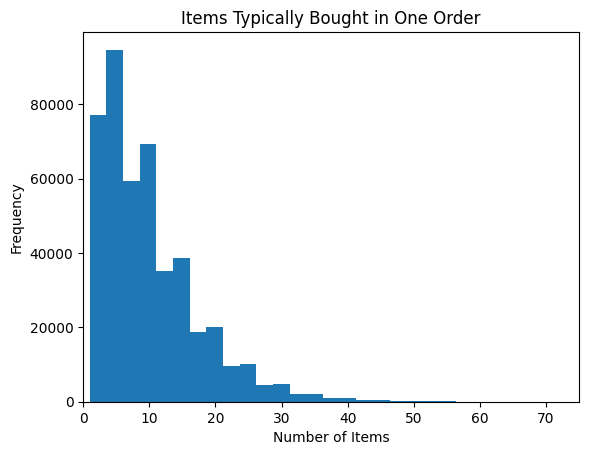

In [ ]:
products_per_order = order_products.groupby('order_id')['product_id'].count()


ax = products_per_order.plot(kind='hist', bins=50, xlim=[0, 75], title='Items Typically Bought in One Order')

ax.set_xlabel('Number of Items')
ax.set_ylabel('Frequency')

plt.show()

### What are the top 20 items that are reordered most frequently?

In [ ]:
reordered = order_products[order_products['reordered'] == 1]

reorder_product = reordered['product_id'].value_counts().head(20).reset_index()
reorder_product.columns = ['product_id', 'reorder_count']

print(reorder_product.merge(products[['product_id', 'product_name']], on='product_id', how='left'))

    product_id  reorder_count              product_name
0        24852          55763                    banana
1        13176          44450    bag of organic bananas
2        21137          28639      organic strawberries
3        21903          26233      organic baby spinach
4        47209          23629      organic hass avocado
5        47766          18743           organic avocado
6        27845          16251        organic whole milk
7        47626          15044               large lemon
8        27966          14748       organic raspberries
9        16797          13945              strawberries
10       26209          13327                     limes
11       22935          11145      organic yellow onion
12       24964          10411            organic garlic
13       45007          10076          organic zucchini
14       49683           9538            cucumber kirby
15       28204           8989        organic fuji apple
16        8277           8836  apple honeycrisp 